In [15]:
#!/usr/bin/python
# updated DBR 02/2025 #

%matplotlib inline

import numpy as np
import scipy.optimize as opt
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#for mixed effects models
import statsmodels.api as sm
import statsmodels.formula.api as smf

import resource; resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots

import os

sns.set_style("ticks")

import warnings
warnings.filterwarnings(action='once')

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width to avoid wrapping
pd.set_option('display.max_colwidth', None)  # Show full content in each column


In [108]:
#read output dataframe from data cleaning and ecology metrics/fitting scripts

dfall=pd.read_csv('data/clean/ecometrics_wprovirusrecalc.csv') #restricted to persistent clonotypes


0.00075118 0.0426349
0.00075118 0.0426349
0.00075118 0.0426349


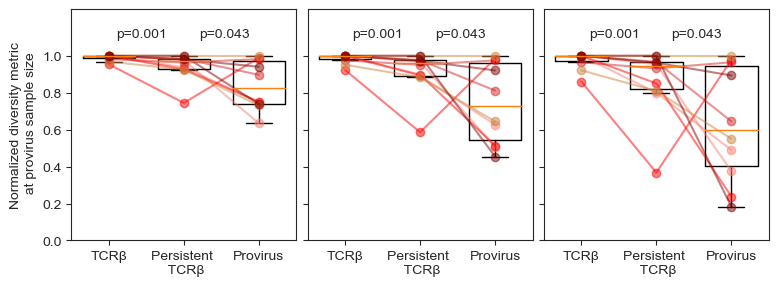

In [3]:
#TCR (raw and persistent) vs provirus, paired in PWH

plt.figure(figsize=(9,3))

df=dfall[(dfall['cohort_num'] == 1)] #just longitudinal cohort PWH
#df=df[df['NHIV']>11]

jit=0.1
sz=20
fulll=[]
fulllc=[]
for im,m in enumerate(['d0','d1','d2']):
    
    plt.subplot(131+im)
    
    tdf=df[[m+'_nH',m+'pst_nH',m+'pro','Npro','color']].dropna() #this gets only the persistent TCR with dropna
    
    y1=tdf[m+'_nH'].values
    y2=tdf[m+'pst_nH'].values
    y3=tdf[m+'pro'].values
    
    plt.boxplot([y1,y2,y3],positions=[1,2,3],widths=0.7,showfliers=False)
    
    for i in range(len(y1)):
        plt.plot([1,2,3],[y1[i],y2[i],y3[i]],color=tdf['color'].iloc[i],marker='o',markersize=6,alpha=0.5)
        
    #test whether difference is greater than 0
    p1=np.round(st.mannwhitneyu(y2-y1,np.zeros(len(y2)))[1],8)
    p2=np.round(st.mannwhitneyu(y3-y2,np.zeros(len(y2)))[1],8)
    
    plt.annotate('p='+str(np.round(p1,3)),[1.1,1.1],)
    plt.annotate('p='+str(np.round(p2,3)),[2.2,1.1],)

    print(p1,p2)
    plt.xlim(0.5,3.5)
    plt.yticks(np.arange(0,1.01,.20))
    plt.ylim(0,1.25)
    plt.xticks([1,2,3],['TCRβ',
                        'Persistent \n TCRβ',
                        'Provirus'])#,rotation=90)
    
    plt.yticks(np.arange(0,1.01,.20))
    if im>0:
        plt.gca().set_yticklabels([])

plt.subplot(131)
plt.ylabel('Normalized diversity metric\n at provirus sample size')

plt.subplots_adjust(wspace=0.05)
plt.savefig('figures/TCRvsHIV-ecol.svg',dpi=600)


6.386e-05 0.01718709


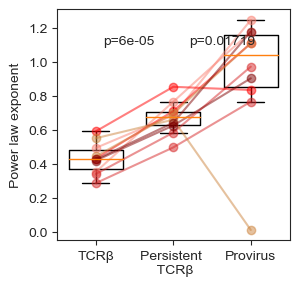

In [4]:
#TCR (raw and persistent) vs provirus, paired in PWH
#power laws


df=dfall[(dfall['cohort_num'] == 1)] #just longitudinal cohort PWH

jit=0.1
sz=20
    
plt.figure(figsize=(3,3))
    
tdf=df[['ali','alpst','alpro','color']].dropna() #this gets only the persistent TCR with dropna

y1=tdf['ali'].values
y2=tdf['alpst'].values
y3=tdf['alpro'].values

plt.boxplot([y1,y2,y3],positions=[1,2,3],widths=0.7,showfliers=False)

for i in range(len(y1)):
    plt.plot([1,2,3],[y1[i],y2[i],y3[i]],color=tdf['color'].iloc[i],marker='o',markersize=6,alpha=0.5)

#test whether difference is greater than 0
p1=np.round(st.mannwhitneyu(y2-y1,np.zeros(len(y2)))[1],8)
p2=np.round(st.mannwhitneyu(y3-y2,np.zeros(len(y2)))[1],8)

plt.annotate('p='+str(np.round(p1,5)),[1.1,1.1],)
plt.annotate('p='+str(np.round(p2,5)),[2.2,1.1],)

print(p1,p2)
plt.xlim(0.5,3.5)
plt.xticks([1,2,3],['TCRβ',
                    'Persistent \n TCRβ',
                    'Provirus'])#,rotation=90)

plt.ylabel('Power law exponent')

plt.savefig('figures/TCRvsHIV-alpha.svg',dpi=600)


0.00743152
0.00743152
0.00743152


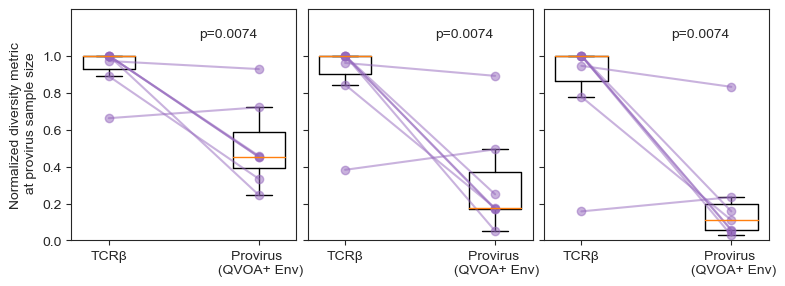

In [5]:
#TCR (raw and persistent) vs provirus, paired in PWH

plt.figure(figsize=(9,3))

df=dfall[(dfall['cohort_num'] == 3)] #just longitudinal cohort PWH

jit=0.1
sz=20
fulll=[]
fulllc=[]
for im,m in enumerate(['d0','d1','d2']):
    
    plt.subplot(131+im)
    
    tdf=df[[m+'_nH',m+'pro','color']].dropna() #this gets only the persistent TCR with dropna
    
    y1=tdf[m+'_nH'].values
    y3=tdf[m+'pro'].values
    
    plt.boxplot([y1,y3],positions=[1,3],widths=0.7,showfliers=False)
    
    for i in range(len(y1)):
        plt.plot([1,3],[y1[i],y3[i]],color=tdf['color'].iloc[i],marker='o',markersize=6,alpha=0.5)
       
    #test whether difference is greater than 0
    p2=np.round(st.mannwhitneyu(y3-y1,np.zeros(len(y2)))[1],8)
    
    plt.annotate('p='+str(np.round(p2,4)),[2.2,1.1],)

    print(p2)
    plt.xlim(0.5,3.5)
    plt.yticks(np.arange(0,1.01,.20))
    plt.ylim(0,1.25)
    plt.xticks([1,3],['TCRβ','Provirus \n (QVOA+ Env)'])#,rotation=90)
    
    plt.yticks(np.arange(0,1.01,.20))
    if im>0:
        plt.gca().set_yticklabels([])

plt.subplot(131)
plt.ylabel('Normalized diversity metric\n at provirus sample size')

plt.subplots_adjust(wspace=0.05)
plt.savefig('figures/TCRvsHIV-ecol-DEL.svg',dpi=600)


6.386e-05 0.0001636


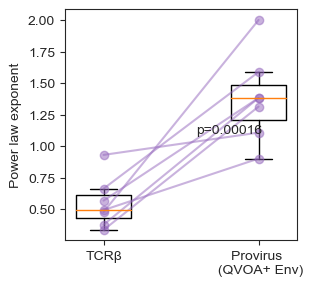

In [6]:
#DEL power law

df=dfall[(dfall['cohort_num'] == 3)] #just longitudinal cohort PWH

jit=0.1
sz=20
    
plt.figure(figsize=(3,3))
    
tdf=df[['ali','alpro','color']].dropna() #this gets only the persistent TCR with dropna

y1=tdf['ali'].values
y3=tdf['alpro'].values

plt.boxplot([y1,y3],positions=[1,3],widths=0.7,showfliers=False)

for i in range(len(y1)):
    plt.plot([1,3],[y1[i],y3[i]],color=tdf['color'].iloc[i],marker='o',markersize=6,alpha=0.5)

#test whether difference is greater than 0
p2=np.round(st.mannwhitneyu(y3-y1,np.zeros(len(y2)))[1],8)

plt.annotate('p='+str(np.round(p2,5)),[2.2,1.1],)

print(p1,p2)
plt.xlim(0.5,3.5)
plt.xticks([1,3],['TCRβ','Provirus \n (QVOA+ Env)'])#,rotation=90)

plt.ylabel('Power law exponent')

plt.savefig('figures/TCRvsHIV-alpha-DEL.svg',dpi=600)


0.00724493
0.00462773
0.00462773


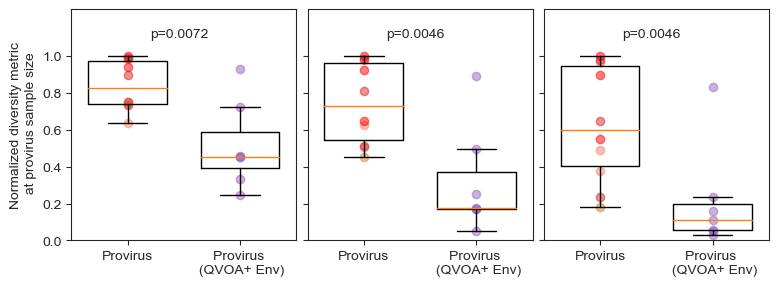

In [7]:
df1=dfall[(dfall['cohort_num'] == 1)] #just longitudinal cohort PWH
df3=dfall[(dfall['cohort_num'] == 3)] #just longitudinal cohort PWH

plt.figure(figsize=(9,3))

for im,m in enumerate(['d0','d1','d2']):

    y1 = df1[m+'pro'].dropna().values
    y3 = df3[m+'pro'].dropna().values
    
    plt.subplot(131+im)
    
    plt.boxplot([y1,y3],positions=[1,2],widths=0.7,showfliers=False)
    
    for i in range(len(y1)):
        plt.scatter(1,y1[i],color=df1['color'].iloc[i],marker='o',alpha=0.5)

    for i in range(len(y3)):
        plt.scatter(2,y3[i],color=df3['color'].iloc[i],marker='o',alpha=0.5)

    #test whether difference is greater than 0
    p2=np.round(st.mannwhitneyu(y1,y3)[1],8)
    
    plt.annotate('p='+str(np.round(p2,4)),[1.2,1.1],)

    print(p2)
    plt.xlim(0.5,2.5)
    plt.yticks(np.arange(0,1.01,.20))
    plt.ylim(0,1.25)
    plt.xticks([1,2],['Provirus',
                        'Provirus \n (QVOA+ Env)'])#,rotation=90)
    
    plt.yticks(np.arange(0,1.01,.20))
    if im>0:
        plt.gca().set_yticklabels([])

plt.subplot(131)
plt.ylabel('Normalized diversity metric\n at provirus sample size')

plt.subplots_adjust(wspace=0.05)
plt.savefig('figures/HIVvsHIVenvqvoa.svg',dpi=600)


/Users/dreeves/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dreeves/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dreeves/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

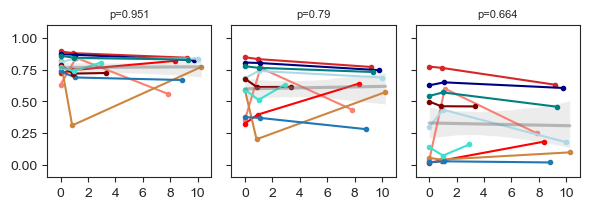

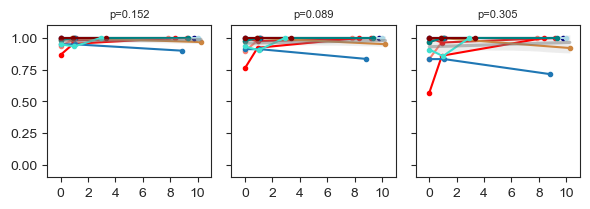

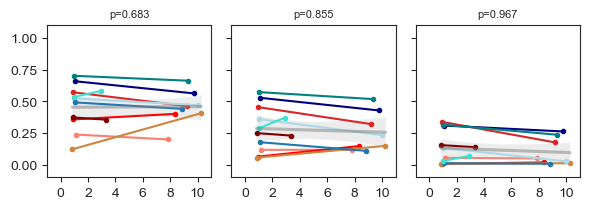

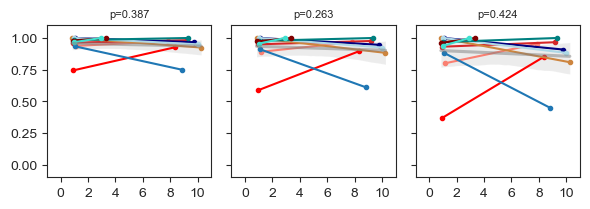

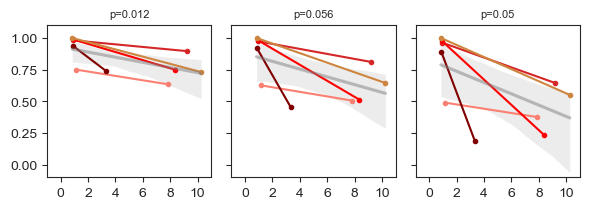

In [114]:
## diversity metrics longitundally (calculated in 0_calcfit-ecology)

for mtype in ['i','_nH','pst','pst_nH','pro']:
    fig,axs = plt.subplots(1,3,sharex=True,sharey=True,figsize=(6,2.2))

    ms = ['d0'+mtype,'d1'+mtype,'d2'+mtype]

    #longitudinal cohorts
    df = dfall[(dfall['cohort_num']==1) | (dfall['cohort_num']==2)]
    df = df[ms+['study_months','color','pid']].dropna()

    for im,m in enumerate(ms):

        ax=axs[im]
        for ci in df['color'].unique():
            tdf = df[df['color']==ci]
            ax.plot(tdf['study_months']/12,tdf[m],color=tdf['color'].iloc[0],marker='.')
            
        sns.regplot(df['study_months']/12,df[m],color='gray',scatter=False,
                    line_kws={'color': 'gray', 'alpha': 0.5, 'linestyle': '-'},ax=ax)

        rho,sp=st.spearmanr(df['study_months']/12,df[m])

        ax.set_title('p='+str(np.round(sp,3)),fontsize=8)
        ax.set_xlabel('')
        ax.set_ylabel('')
    ax.set_xticks(range(0,11,2))
    ax.set_xlim([-1,11])

    ax.set_ylim([-0.1,1.1])

    plt.tight_layout()

    plt.savefig('figures/longit_'+mtype+'.svg',dpi=600)



/Users/dreeves/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dreeves/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dreeves/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

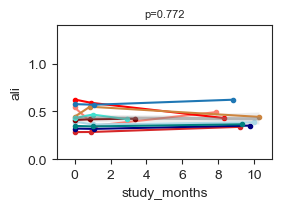

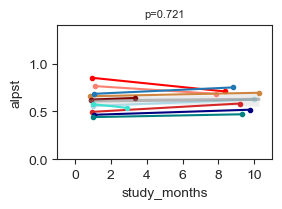

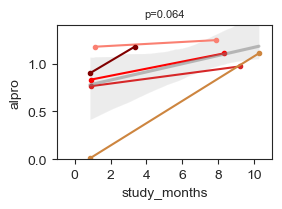

In [115]:
## power laws longitudinally

for mtype in ['i','pst','pro']:
    plt.figure(figsize=(3,2.2))

    ms = ['al'+mtype]

    #longitudinal cohorts
    df = dfall[(dfall['cohort_num']==1) | (dfall['cohort_num']==2)]
    df = df[ms+['study_months','color','pid']].dropna()

    for im,m in enumerate(ms):

        #plt.yticks(np.linspace(0,2,11))
        for ci in df['color'].unique():
            tdf = df[df['color']==ci]
            plt.plot(tdf['study_months']/12,tdf[m],color=tdf['color'].iloc[0],marker='.')
            
        sns.regplot(df['study_months']/12,df[m],color='gray',scatter=False,
                    line_kws={'color': 'gray', 'alpha': 0.5, 'linestyle': '-'})

        rho,sp=st.spearmanr(df['study_months']/12,df[m])

        plt.title('p='+str(np.round(sp,3)),fontsize=8)
        plt.xticks(range(0,11,2))
        plt.xlim([-1,11])
        plt.ylim([0,1.4])

        plt.ylabel(m)

    plt.tight_layout()

    plt.savefig('figures/longit_al'+mtype+'.svg',dpi=600)



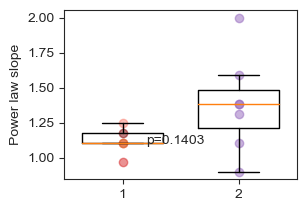

In [12]:
#final al pro vs DEL
plt.figure(figsize=(3,2.2))

df1 = dfall[dfall['cohort_num']==1]
df1 = df1[df1['study_months']>15] #just later ones

df3 = dfall[dfall['cohort_num']==3]

y1 = df1['alpro'].dropna().values
y3 = df3['alpro'].dropna().values

c1 = df1['color'].values
c3 = df3['color'].values

plt.boxplot([y1,y3],positions=[1,2],widths=0.7,showfliers=False)

for i in range(len(y1)):
    plt.scatter(1,y1[i],color=c1[i],marker='o',alpha=0.5)

for i in range(len(y3)):
    plt.scatter(2,y3[i],color=c3[i],marker='o',alpha=0.5)

#test whether difference is greater than 0
p2=np.round(st.mannwhitneyu(y1,y3)[1],8)

plt.annotate('p='+str(np.round(p2,4)),[1.2,1.1],)

plt.ylabel('Power law slope')

plt.savefig('figures/HIVvsHIVenvqvoa2.svg',dpi=600)



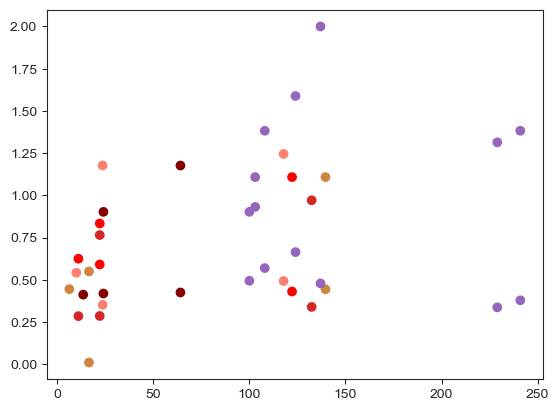

In [13]:
#power law slopes
tdf = dfall[['mo_post_ART','alpro','color']].dropna()

#sns.regplot(tdf['mo_post_ART'],tdf['alpro'],)
plt.scatter(tdf['mo_post_ART'],tdf['alpro'],c=tdf['color'])

tdf = dfall[['mo_post_ART','ali','color']].dropna()

plt.scatter(tdf['mo_post_ART'],tdf['ali'],c=tdf['color'])

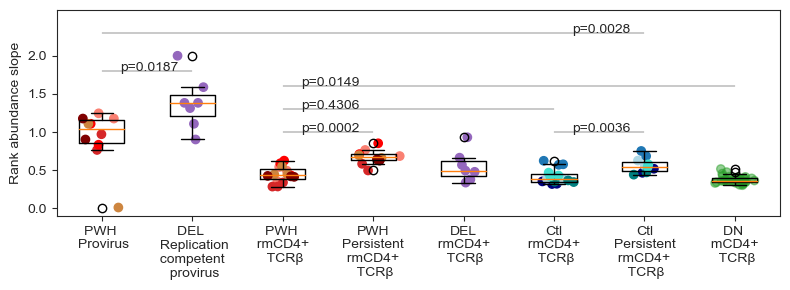

In [105]:
jit=0.1

bigl=[]

plt.figure(figsize=(8,3))

#PWH provirus
tdf=dfall[['alpro','color']][dfall['cohort']=='PWH'].dropna()
plt.scatter(1+np.random.normal(0,jit,len(tdf)),tdf['alpro'],c=tdf['color'])
y1 = list(tdf['alpro'].values)

#DEL provirus
tdf=dfall[['alpro','color']][dfall['cohort']=='DEL'].dropna()
plt.scatter(2+np.random.normal(0,jit,len(tdf)),tdf['alpro'],c=tdf['color'])
y2 = list(tdf['alpro'].values)

#PWH bulk TCR
tdf=dfall[['ali','color']][dfall['cohort']=='PWH'].dropna()
plt.scatter(3+np.random.normal(0,jit,len(tdf)),tdf['ali'],c=tdf['color'])
y3 = list(tdf['ali'].values)

#PWH persistent TCR
tdf=dfall[['alpst','color']][dfall['cohort']=='PWH'].dropna()
plt.scatter(4+np.random.normal(0,jit,len(tdf)),tdf['alpst'],c=tdf['color'])
y4 = list(tdf['alpst'].values)

#DEL bulk TCR
tdf=dfall[['ali','color']][dfall['cohort']=='DEL'].dropna()
plt.scatter(5+np.random.normal(0,jit,len(tdf)),tdf['ali'],c=tdf['color'])
y5 = list(tdf['ali'].values)

#Ctl bulk TCR
tdf=dfall[['ali','color']][dfall['cohort']=='Ctl'].dropna()
plt.scatter(6+np.random.normal(0,jit,len(tdf)),tdf['ali'],c=tdf['color'])
y6 = list(tdf['ali'].values)

#Ctl persistent TCR
tdf=dfall[['alpst','color']][dfall['cohort']=='Ctl'].dropna()
plt.scatter(7+np.random.normal(0,jit,len(tdf)),tdf['alpst'],c=tdf['color'])
y7 = list(tdf['alpst'].values)

#DN bulk TCR
tdf=dfall[['ali','color']][dfall['cohort']=='DN'].dropna()
#sns.stripplot(tdf['ali']c=tdf['color'],alpha=0.5)
plt.scatter(8+np.random.normal(0,jit,len(tdf)),tdf['ali'],c=tdf['color'],alpha=0.5)
y8 = list(tdf['ali'].values)

plt.boxplot([y1,y2,y3,y4,y5,y6,y7,y8],positions=np.arange(8)+1)

plt.xticks(np.arange(8)+1,
           ['PWH \n Provirus','DEL \n Replication\n competent \n provirus',
           'PWH \n rmCD4+ \n TCRβ','PWH\n Persistent \n rmCD4+ \n TCRβ',
            'DEL\n rmCD4+ \n TCRβ','Ctl\n rmCD4+ \n TCRβ','Ctl\n Persistent \n rmCD4+ \n TCRβ',
            'DN \n mCD4+ \n TCRβ'])



### test some cross sectional differences

#pwh provirus is different from qvoa del provirus (but also env vs nfl)
pval=np.round(st.mannwhitneyu(y1,y2)[1],8)
plt.annotate('p='+str(np.round(pval,4)),[1.2,1.8],)
plt.plot([1,2],[1.8,1.8],color='k',lw=0.3,marker='')

#pwh persistent are different from non persistent
pval=np.round(st.mannwhitneyu(y3,y4)[1],8)
plt.annotate('p='+str(np.round(pval,4)),[3.2,1.],)
plt.plot([3,4],[1.,1.],color='k',lw=0.3,marker='')

#ctl persistent are different from non persistent
pval=np.round(st.mannwhitneyu(y6,y7)[1],8)
plt.annotate('p='+str(np.round(pval,4)),[6.2,1.],)
plt.plot([6,7],[1.,1.],color='k',lw=0.3,marker='')

'''#pwh provirus is different from DEL tcr
pval=np.round(st.mannwhitneyu(y1,y5)[1],8)
plt.annotate('p='+str(np.round(pval,4)),[4.2,2.1],)
plt.plot([1,5],[2.1,2.1],color='k',lw=0.3,marker='')
'''

#pwh provirus is different from ctl persistent
pval=np.round(st.mannwhitneyu(y1,y7)[1],8)
plt.annotate('p='+str(np.round(pval,4)),[6.2,2.3],)
plt.plot([1,7],[2.3,2.3],color='k',lw=0.3,marker='')

#pwh bulk tcr are same as ctl
pval=np.round(st.mannwhitneyu(y3,y6)[1],8)
plt.annotate('p='+str(np.round(pval,4)),[3.2,1.3],)
plt.plot([3,6],[1.3,1.3],color='k',lw=0.3,marker='')

#pwh bulk tcr are different from de neuter, could be ages or r vs rm
pval=np.round(st.mannwhitneyu(y3,y8)[1],8)
plt.annotate('p='+str(np.round(pval,4)),[3.2,1.6],)
plt.plot([3,8],[1.6,1.6],color='k',lw=0.3,marker='')

plt.yticks([0,0.5,1,1.5,2])
plt.ylim([-0.1,2.6])
plt.ylabel('Rank abundance slope')
plt.tight_layout()
plt.savefig('figures/alpha_ALLcomparisons.svg')